In [6]:
import cv2
import re
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
img = cv2.imread('01.png')

def convert_grayscale(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

# noise removal
def remove_noise(image, param):
    img = cv2.medianBlur(image, param)
    return img

# thresholding
def thresholding(image):
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return img

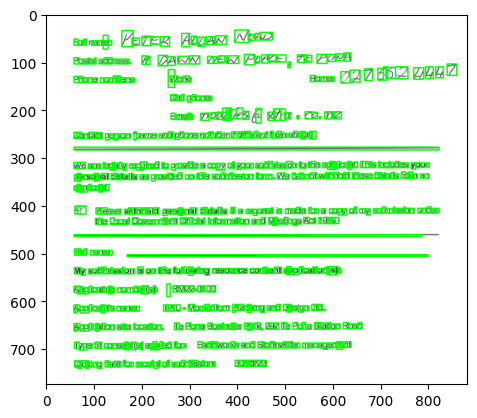

In [8]:
h, w, c = img.shape

# obtain the boxes
boxes = pytesseract.image_to_boxes(img)

# for loop to draw the rectangle on detected words
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# display the image with the boxes
cv2.imshow('img', img)

plt.imshow(img, cmap='gray')
plt.show()


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


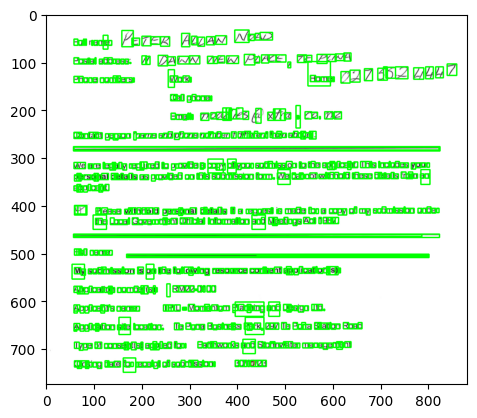

In [9]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

# fethces number of boxes containing words
n_boxes = len(d['text'])

# loop over the boxes and draw rectangles over those boxes which have more than 60% confidence
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# display the image with the boxes
cv2.imshow('img', img)

# use plt to display the image
plt.imshow(img, cmap='gray')
plt.show()

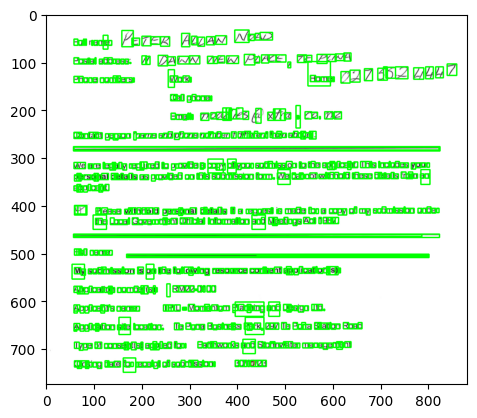

In [10]:
# Template Matching
d = pytesseract.image_to_data(img, output_type=Output.DICT)
key = list(d.keys())

date_pattern = r"^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$"

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)

plt.imshow(img, cmap='gray')
plt.show()
